Accuracy: 1.0
Confusion: [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



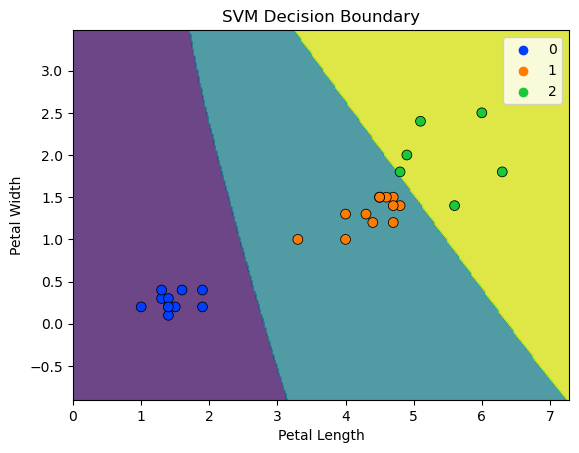

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Example Data (Iris dataset)
iris = load_iris()

# Using petal length and petal width as features
X = iris.data[:, 2:4]
y = iris.target

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=0)

# Creating and training the SVM model with RBR kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
model.fit(X_train, Y_train)

# Making prediction
y_pred = model.predict(X_test)
y_pred

# Evaluting the model
accuracy = accuracy_score(Y_test, y_pred)
conf_mat = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion: {conf_mat}')
print(f'classification_report: {class_report}')

# ploting the decision boundary

def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha = 0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y, palette = 'bright',
edgecolor = 'k', s = 50)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, Y_test, model)